# UUV POMDP Single Agent

In [1]:
from fimdpenv import setup, UUVEnv
setup()


In [2]:
from fimdpenv.UUVEnv import SingleAgentEnv

In [3]:
from fipomdp import ConsPOMDP



In [4]:
from fipomdp.environment_utils import set_cross_observations_to_grid
from fipomdp.environment_utils import get_guessing_stats

env = SingleAgentEnv(grid_size=[4, 4], capacity=20, reloads=[0], targets=[0], init_state=0, enhanced_actionspace=0)
mdp, targets = env.get_consmdp()
mdp.__class__ = ConsPOMDP
set_cross_observations_to_grid(mdp, (env.grid_size[0], env.grid_size[1]))
print(mdp.obs_probabilities)

{(0, 0): 1.0, (5, 1): 0.05, (2, 1): 0.05, (1, 1): 0.9, (6, 2): 0.05, (1, 2): 0.05, (3, 2): 0.05, (2, 2): 0.85, (7, 3): 0.05, (2, 3): 0.05, (3, 3): 0.9, (8, 4): 0.05, (5, 4): 0.05, (4, 4): 0.9, (1, 5): 0.05, (9, 5): 0.05, (4, 5): 0.05, (6, 5): 0.05, (5, 5): 0.8, (2, 6): 0.05, (10, 6): 0.05, (5, 6): 0.05, (7, 6): 0.05, (6, 6): 0.8, (3, 7): 0.05, (11, 7): 0.05, (6, 7): 0.05, (7, 7): 0.85, (4, 8): 0.05, (12, 8): 0.05, (9, 8): 0.05, (8, 8): 0.85, (5, 9): 0.05, (13, 9): 0.05, (8, 9): 0.05, (10, 9): 0.05, (9, 9): 0.8, (6, 10): 0.05, (14, 10): 0.05, (9, 10): 0.05, (11, 10): 0.05, (10, 10): 0.8, (7, 11): 0.05, (15, 11): 0.05, (10, 11): 0.05, (11, 11): 0.85, (8, 12): 0.05, (13, 12): 0.05, (12, 12): 0.9, (9, 13): 0.05, (12, 13): 0.05, (14, 13): 0.05, (13, 13): 0.85, (10, 14): 0.05, (13, 14): 0.05, (15, 14): 0.05, (14, 14): 0.85, (11, 15): 0.05, (14, 15): 0.05, (15, 15): 0.9}


In [5]:
guess_time_dict = []

for i in range(2, 31):
    tmp_env = SingleAgentEnv(grid_size=[i, i], capacity=20, reloads=[0], targets=[0], init_state=0, enhanced_actionspace=0)
    mdp, targets = tmp_env.get_consmdp()
    mdp.__class__ = ConsPOMDP
    set_cross_observations_to_grid(mdp, (i, i))
    comp_time, cpomdp_ns, belief_supp_cmdp_ns, guessing_cmdp_ns = get_guessing_stats(mdp, [0])
    guess_time_dict.append((i, comp_time, guessing_cmdp_ns))
    print(f"SQUARE GRID SIDE: {i}, TIME COMPUTING GUESSES: {comp_time}, STATE_COUNT[CPOMDP, BEL_SUPP, GUESS]: [{cpomdp_ns}, {belief_supp_cmdp_ns}, {guessing_cmdp_ns}]")

SQUARE GRID SIDE: 2, TIME COMPUTING GUESSES: 0.0042192935943603516, STATE_COUNT[CPOMDP, BEL_SUPP, GUESS]: [4, 8, 21]
SQUARE GRID SIDE: 3, TIME COMPUTING GUESSES: 0.05720329284667969, STATE_COUNT[CPOMDP, BEL_SUPP, GUESS]: [9, 55, 194]
SQUARE GRID SIDE: 4, TIME COMPUTING GUESSES: 0.23638343811035156, STATE_COUNT[CPOMDP, BEL_SUPP, GUESS]: [16, 154, 579]
SQUARE GRID SIDE: 5, TIME COMPUTING GUESSES: 0.6284017562866211, STATE_COUNT[CPOMDP, BEL_SUPP, GUESS]: [25, 293, 1126]
SQUARE GRID SIDE: 6, TIME COMPUTING GUESSES: 1.3273074626922607, STATE_COUNT[CPOMDP, BEL_SUPP, GUESS]: [36, 474, 1843]
SQUARE GRID SIDE: 7, TIME COMPUTING GUESSES: 2.354426145553589, STATE_COUNT[CPOMDP, BEL_SUPP, GUESS]: [49, 697, 2730]
SQUARE GRID SIDE: 8, TIME COMPUTING GUESSES: 4.006664991378784, STATE_COUNT[CPOMDP, BEL_SUPP, GUESS]: [64, 962, 3787]
SQUARE GRID SIDE: 9, TIME COMPUTING GUESSES: 6.497903823852539, STATE_COUNT[CPOMDP, BEL_SUPP, GUESS]: [81, 1269, 5014]
SQUARE GRID SIDE: 10, TIME COMPUTING GUESSES: 9.907437

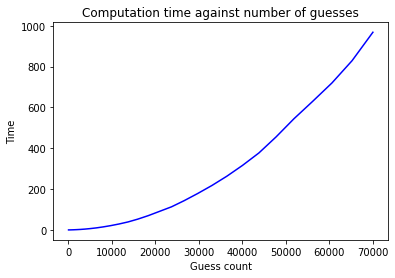

In [6]:
import matplotlib.pyplot as plt

x = [guess_time[2] for guess_time in guess_time_dict]
y = [guess_time[1] for guess_time in guess_time_dict]

plt.title("Computation time against number of guesses")
plt.xlabel("Guess count")
plt.ylabel("Time")
plt.plot(x, y, color ="blue")
plt.show()

In [10]:
from fipomdp.energy_solvers import ConsPOMDPBasicES

env = SingleAgentEnv(grid_size=[4, 4], capacity=20, reloads=[0], targets=[0], init_state=0, enhanced_actionspace=0)
mdp, targets = env.get_consmdp()
mdp.__class__ = ConsPOMDP
set_cross_observations_to_grid(mdp, (env.grid_size[0], env.grid_size[1]))

solver = ConsPOMDPBasicES(mdp, [0], env.capacities[0], targets)
solver.compute_buchi()
